### 데이터 가져오기

In [1]:
! ls ~/data/data/bike-sharing-demand

sampleSubmission.csv  test.csv	train.csv


In [2]:
import pandas as pd
train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [8]:

dt_index = pd.DatetimeIndex(pd.to_datetime(train['datetime']))

In [35]:
train = train.assign(
    year=dt_index.year, 
    month=dt_index.month,
    day=dt_index.day,
    hour=dt_index.hour, 
    minute=dt_index.minute, 
    second=dt_index.second, 
).drop(columns=['datetime'])


In [36]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


### year, month, day, hour, minute, second 데이터 개수 시각화하기

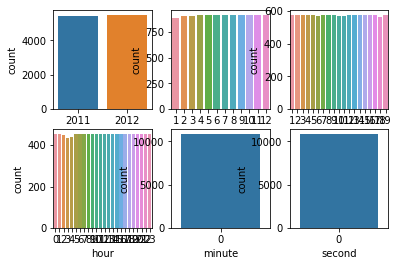

In [28]:
from matplotlib import pyplot as plt
import seaborn as sns

column_names = ['year', 'month', 'day', 'hour', 'minute', 'second']
fig
for i, column in enumerate(column_names):
    ax1 = plt.subplot(2, 3, i+1)
    sns.countplot(x=train[column], ax=ax1)
plt.show()

### X, y 컬럼 선택 및 train/test 데이터 분리

In [61]:
X = train.drop(columns = ['casual', 'registered', 'count'])#.values
y = train['count'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### LinearRegression 모델 학습

In [62]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [63]:
test = pd.read_csv('~/data/data/bike-sharing-demand/test.csv')
dt_index = pd.DatetimeIndex(pd.to_datetime(test['datetime']))
test = test.assign(
    year=dt_index.year, 
    month=dt_index.month,
    day=dt_index.day,
    hour=dt_index.hour, 
    minute=dt_index.minute, 
    second=dt_index.second, 
).drop(columns=['datetime'])

test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0


In [59]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'MSE: {mse}, RMSE: {rmse}')

MSE: 19945.370053754086, RMSE: 141.22807813517142


### x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

<AxesSubplot:xlabel='temp'>

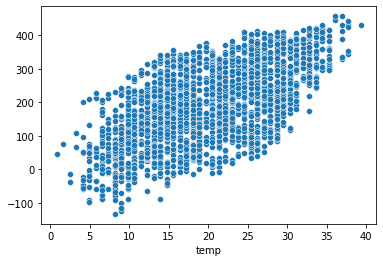

In [67]:
sns.scatterplot(x=X_test['temp'], y=predictions)

<AxesSubplot:xlabel='humidity'>

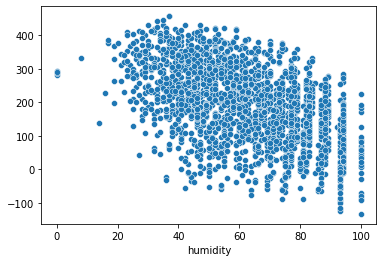

In [69]:
sns.scatterplot(x=X_test['humidity'], y=predictions)

평가문항	상세기준
1. 프로젝트 1의 회귀모델 예측정확도가 기준 이상 높게 나왔는가?
    - MSE 손실함수값 3000 이하를 달성
2. 프로젝트 2의 회귀모델 예측정확도가 기준 이상 높게 나왔는가?
    - RMSE 값 150 이하를 달성
3. 시각화 요구사항이 정확하게 이루어졌는가?
    - 각 프로젝트 진행 과정에서 요구하고 있는 데이터개수 시각화 및 예측결과 시각화를 모두 진행하였다.